<a href="https://colab.research.google.com/github/zzwony/Start_0920/blob/main/12_26_OpenCV01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### OpenCV
- Open Source Computer Vision Library는 오픈소스 이미지(동영상) 라이브러리
- 이미지 형식 변환, 필터 처리, 얼굴 인식, 물체 인식, 문자 인식 등 이미지와 관련된 다양한 처리
- 머신러닝에서 OpenCV 사용 : 머신러닝의 입력으로 전달하려면 이미지를 숫자 배열 데이터로 변경
- pip install opencv-python


이미지와 넘파이
- 이미지는 배열로 표현 가능
- 이미지 읽기: pillow, matplotib, OpenCV 가능

In [2]:
!pwd

/content


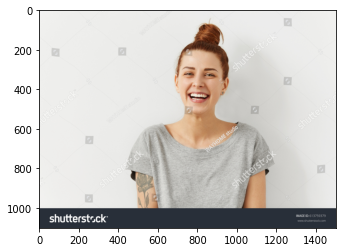

In [5]:
# 이미지 다운로드
# urlib.request 모듀은 웹사이트 데이터 접근
import urllib.request as req
import matplotlib.pyplot as plt
import cv2

url = 'https://image.shutterstock.com/z/stock-photo-happy-cheerful-young-woman-wearing-her-red-hair-\
in-bun-rejoicing-at-positive-news-or-birthday-gift-613759379.jpg'

req.urlretrieve(url, 'lady.png') ## dowload

# OpenCV로 읽어 들이기
img = cv2.imread('lady.png')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) ## 이미지 출력
plt.show()

# Opencv는 BGR로 되어있고 matplot은 RGB로 되어있다.
# Opencv를 matplot으로 불러오는거기 때문에 바꿔줘야한다.
# 2는 영어 to를 그대로 쓴것

저장되었습니다.


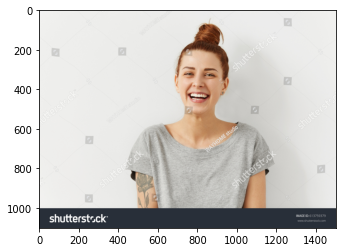

In [6]:
# url을 열어서 읽고 저장하기
import urllib.request

url = 'https://image.shutterstock.com/z/stock-photo-happy-cheerful-young-woman-wearing-her-red-hair-\
in-bun-rejoicing-at-positive-news-or-birthday-gift-613759379.jpg'

savename = 'lady.png'

men = urllib.request.urlopen(url).read()

with open(savename, mode='wb') as f:
  f.write(men)
  print('저장되었습니다.')

img = cv2.imread('lady.png')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  ## 이미지 출력
plt.show()

# wb에서 w는 write, b는 바이너리 이다. 이진으로 저장하겠다는것
# men을 불러와서 저장하겠다. (위의 urlretrieve와 같은 과정)


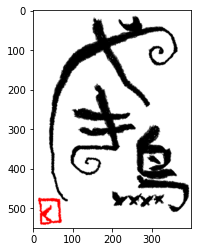

In [8]:
# 연습
import urllib.request as req
import matplotlib.pyplot as plt
import cv2

url = 'http://uta.pw/shodou/img/28/214.png'

req.urlretrieve(url, 'pre.png')

img = cv2.imread('pre.png')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
ls

drive/  lady.png  pre.png  sample_data/


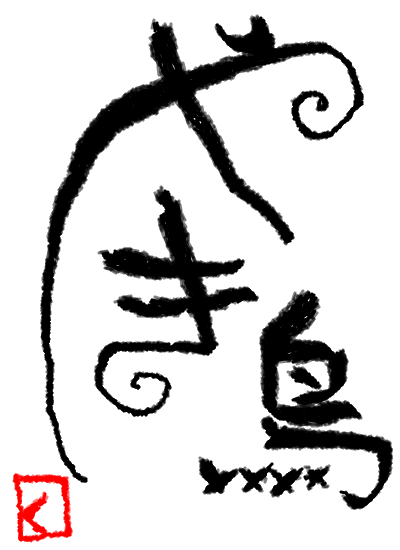

In [11]:
# OpenCV로 출력하기
## 코렙에서 opencv로 출력하려면 꼭 이렇게 import를 해줘야한다.
from google.colab.patches import cv2_imshow

img = cv2.imread('pre.png')
cv2_imshow(img)

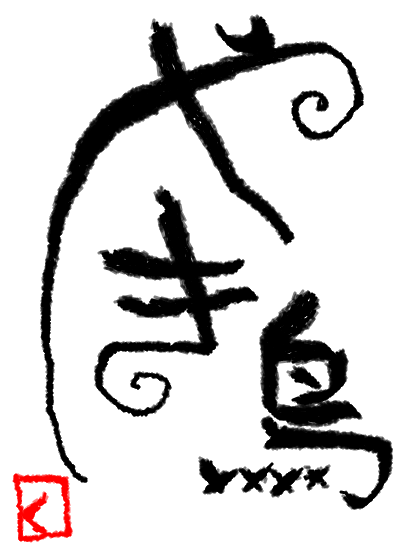

In [12]:
# PIL이란: 파이썬 이미지 처리 라이브러리
from PIL import Image
from io import BytesIO
import requests

response = requests.get(url)
pic = Image.open(BytesIO(response.content))
pic

In [13]:
type(img)

numpy.ndarray

In [14]:
img.shape

(550, 400, 3)

In [15]:
img_copy = img.copy()
img_copy.shape

(550, 400, 3)

In [16]:
print(img_copy[:,:,1])
print(img_copy[:,:,1].shape)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(550, 400)


In [17]:
img = cv2.imread('pre.png')
img_copy = img.copy()

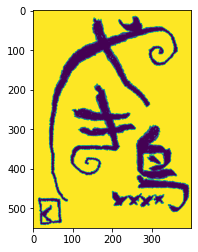

In [19]:
# 3개중에 0만 취해서 출력하기
# 이런식으로 이미지 조작이 가능하다.
plt.imshow(img_copy[:,:,0])
plt.show()

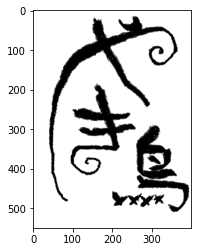

In [21]:
plt.imshow(img_copy[:,:,2], cmap='gray')  ## 컬러가 없어지고 gray가 나타났다.
plt.show()

# 도형 그리기

https://copycoding.tistory.com/147

- img – image
- center – 타원의 중심
- axes – 중심에서 가장 큰 거리와 작은 거리
- angle – 타원의 기울기 각
- startAngle – 타원의 시작 각도
- endAngle – 타원이 끝나는 각도
- color – 타원의 색
- thickness – 선 두께 -1이면 안쪽을 채움

cv2.ellipse(img, center, axes, angle, startAngle, endAngle, color[, thickness[, lineType[, shift]]]) → img



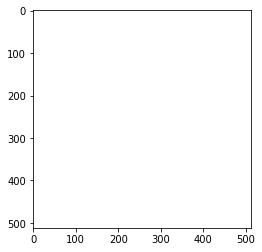

In [42]:
## 8비트짜리 데이터를 쓰며 3차원 배열이다.
import numpy as np
img = np.zeros((512,512, 3), np.uint8)
img.fill(255)
plt.imshow(img)

255로 된것은 전부 흰색으로 나온다.

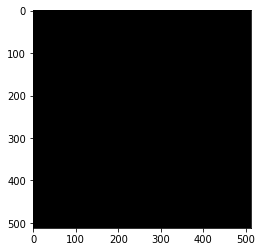

In [43]:
img = np.zeros((512,512,3), np.uint8)

plt.imshow(img)
plt.show()

0은 전부 black으로 나온다.

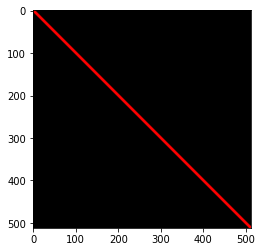

In [44]:
# line 함수를 이용해서 이미지에 선 그리기
img = cv2.line(img, (0,0), (511, 511), (255,0,0),5)

plt.imshow(img)
plt.show()

# (255,0,0)은 RGB이다. (0,255,0) 하면 녹색이 출력된다.
# 뒤에 5는 선의 넓이이다.

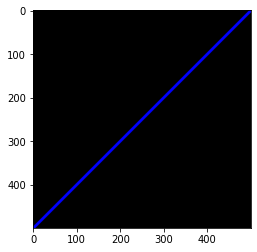

In [35]:
# (500, 0)의 오른쪽 상단 지점에서 (0, 500)의 왼쪽 아래에 있는 점까지 연결 된 두께가 있는 (5Pixel) 선
black_canvas = np.zeros((500, 500, 3), dtype='uint8')
blue = (0,0,255)
img = cv2.line(black_canvas, (500, 0), (0, 500), blue, 5)
plt.imshow(img)
plt.show()

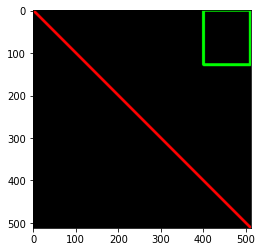

In [45]:
img = cv2.rectangle(img, (400, 0), (510, 128), (0, 255, 0), 5)
plt.imshow(img)
plt.show()
# rectangle은 사각형을 의미한다.

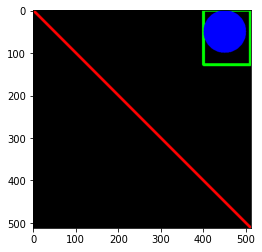

In [46]:
img = cv2.circle(img, (450,50), 50, (0,0,255), -1)  ## -1은 채우는거.
plt.imshow(img)
plt.show()

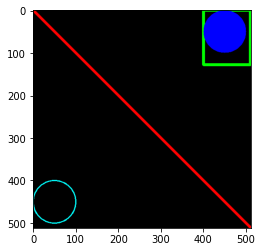

In [47]:
img = cv2.circle(img, (50, 450), 50, (0,255,255), 2)
plt.imshow(img)
plt.show()

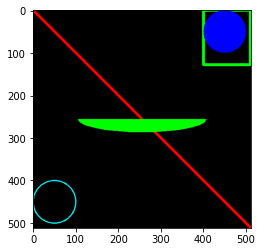

In [49]:
img = cv2.ellipse(img, (256, 256),(150,30), 0,0,180,(0,255,0),-1)
plt.imshow(img)
plt.show()

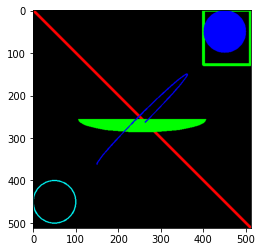

In [51]:
img = cv2.ellipse(img, (256,256),(150,10), 135,0,270,(0,0,255),2)
plt.imshow(img)
plt.show()

In [52]:
# 다각형
pts = np.array([[10,5], [20,30],[70,20],[50,10]], np.int32)
print(pts.shape)
pts = pts.reshape((-1,2,1))
print(pts.shape)

(4, 2)
(4, 2, 1)


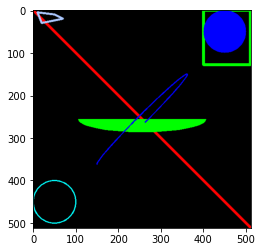

In [53]:
img = cv2.polylines(img, [pts], True, (172,200,255),4)
plt.imshow(img)
plt.show()

# True는 isClosed인 닫힌 여부를 보는것이다.
# pts 만든걸 집어넣었다.
# pts는 연결할 꼭지점 좌표이다.

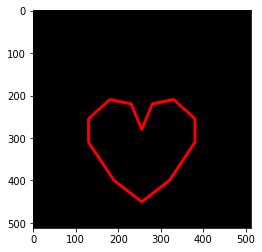

In [54]:
image = np.zeros((512, 512, 3), np.uint8)
points = np.array([[255,280],[280,220],[330,210],[380,255],[380,310],[320,400],[255,450],
                   [190,400],[130,310],[130,255],[180,210],[230,220],[255,280]])
image = cv2.polylines(image, [points], True, (255,0,0), 5)

plt.imshow(image)
plt.show()

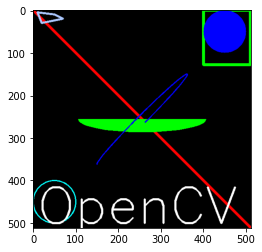

In [55]:
# Text
img = cv2.putText(img, 'OpenCV', (10, 500), cv2.FONT_HERSHEY_SIMPLEX,4,(255,255,255),3)
plt.imshow(img)
plt.show()

#### 글씨 : cv2.putText 메서드를 사용

cv2.putText(image, text, pt, face, scale, color [,thickness [,linetype [,align]]])

image – 이미지, text – 출력 문자, pt – 출력 좌표(좌측 하단), face – 폰트 face

cv2.FONT_HERSHEY_SIMPLE,FONT_HERSHEY_PLAIN,FONT_HERSHEY_DUPLEX,FONT_HERSHEY_COMPLEX,FONT_HERSHEY_TRIPLEX,FONT_HERSHEY_COMPLEX_SMALL,
FONT_HERSHEY_SCRIPT_SIMPLEX,FONT_HERSHEY_SCRIPT_COMPLEX

scale –  크기, color – 색상, thickness –  두께, 
linetype – 선 종류(cv2.LINE_8, cv2.LINE_4, cv2.LINE_AA)align – pt 옵션( True – 좌측 하단, False – 좌측 상단)


- 컬러 매핑 : 주로 그레이 스케일, 트루 컬러 이미지를 많이 활용
- RGB : 빛을 섞을 수록 밝아짐(가산혼합), 모니터, TV, 빔프로젝트 등에서 사용
- CMYK : 섞을 수록 어두워지는 방식(감산혼합). 청록색, 자홍색, 노랑색, 검은색을 기본으로 하여 주로 컬러 프린터나 인쇄시에 사용
- YUV : Y축은 밝기 성분을 U,V 두축을 이용하여 색상 표현. 아날로그 방식
- YCbCr : Digital TV에서 사용하는 색공간. YPbPr이라는 아날로그 신호의 색공간을 디지털화한 것


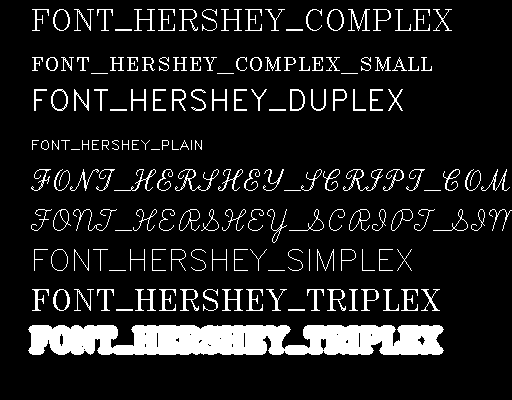

In [56]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = np.zeros((400,512,3),np.uint8)

cv2.putText(image, "FONT_HERSHEY_COMPLEX", (30, 30), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255))
cv2.putText(image, "FONT_HERSHEY_COMPLEX_SMALL", (30, 70), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 255, 255))
cv2.putText(image, "FONT_HERSHEY_DUPLEX", (30, 110), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 255, 255))
cv2.putText(image, "FONT_HERSHEY_PLAIN", (30, 150), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255)) # white, plain
cv2.putText(image, "FONT_HERSHEY_SCRIPT_COMPLEX", (30, 190), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 1, (255, 255, 255)) # white, script_complex
cv2.putText(image, "FONT_HERSHEY_SCRIPT_SIMPLEX", (30, 230), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, (255, 255, 255)) # white, script_simple
cv2.putText(image, "FONT_HERSHEY_SIMPLEX", (30, 270), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255)) # white, simplex
cv2.putText(image, "FONT_HERSHEY_TRIPLEX", (30, 310), cv2.FONT_HERSHEY_TRIPLEX, 1, (255, 255, 255)) # white, triplex
cv2.putText(image, "FONT_HERSHEY_TRIPLEX", (30, 350), cv2.FONT_HERSHEY_TRIPLEX, 1, (255, 255, 255), cv2.LINE_8) # white, triplex
cv2_imshow(image)

In [58]:
# 데이터 가져오기
!wget -O dog.jpg https://cdn.pixabay.com/photo/2017/09/25/13/12/cocker-spaniel-2785074_960_720.jpg

--2022-12-26 03:18:13--  https://cdn.pixabay.com/photo/2017/09/25/13/12/cocker-spaniel-2785074_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 172.64.150.12, 104.18.37.244, 2606:4700:4400::ac40:960c, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|172.64.150.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132045 (129K) [binary/octet-stream]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>] 128.95K  --.-KB/s    in 0.004s  

2022-12-26 03:18:14 (32.2 MB/s) - ‘dog.jpg’ saved [132045/132045]



In [59]:
# 현재 로컬 파일
!ls

dog.jpg  drive	lady.png  pre.png  sample_data


In [60]:
import cv2
origin_img = cv2.imread('/content/dog.jpg')
print(origin_img.shape)

(640, 960, 3)


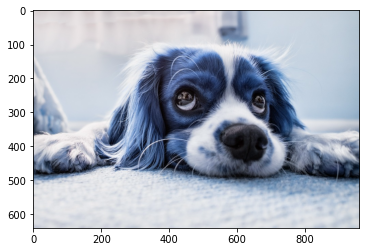

In [61]:
import matplotlib.pyplot as plt
plt.imshow(origin_img)
plt.show()

색 배열이 바뀌었다.

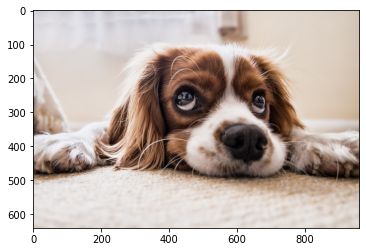

In [62]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB))
plt.show()

HSV Color Space
- 색상(Hue),채도(Saturation),명도(Value)로 색을 표현
- 색상은 색의 종류, 채도는 색의 순도, 명도는 빛의 세기
- OpenCV에서 BGR2HSV 색 공간 변환할 경우 H(0~179 사이 정수), S(0 ~ 255 사이 정수), V(0 ~ 255 사이 정수)
 - 색상 값은 0 ~ 360 으로 표시하지만 uchar 자료형은 256 이상의 정수를 표현할 수 없기 때문에 OpenCV에서는 각도를 2로 나눈 값을 H로 저장


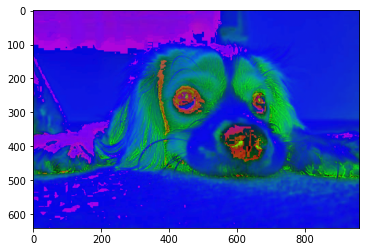

In [63]:
img_hsv = cv2.cvtColor(origin_img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)
plt.show()

HSL Color Space
- 색상(Hue), 채도(Satulation), 밝기(Lightness)로 표현하는 방식
- HSV와 동일하지만 밝기 요소의 차이
- HSV와 더불어 사람이 실제로 color를 인지하는 방식과 유사


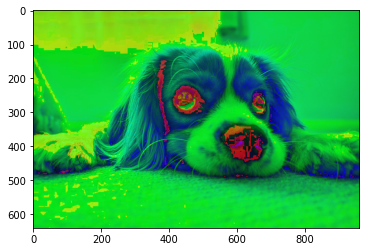

In [64]:
img_hsl = cv2.cvtColor(origin_img, cv2.COLOR_BGR2HLS)
plt.imshow(img_hsl)
plt.show()

In [65]:
print(np.max(img_hsl), np.min(img_hsl))

255 0


YCrCb Color Space
- Y 성분은 밝기 또는 휘도(luminance),Cr,Cb 성분은 색상 또는 색차를 나타냄
- Cr, Cb는 오직 색상 정보만 가지고 있음. 밝기 정보 없음
- 영상을 GrayScale 정보와 색상 정보로 분리하여 처리할 때 유용
- 0 ~ 255 사이의 정수로 표현


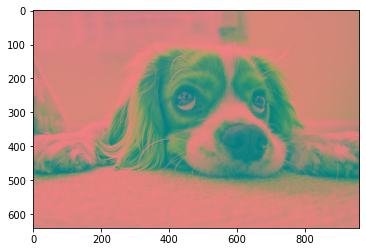

In [67]:
img_ycbcr = cv2.cvtColor(origin_img, cv2.COLOR_BGR2YCrCb)
plt.imshow(img_ycbcr)
plt.show()

GrayScale Color Space 
- 영상의 밝기 정보를 256단계(0 ~ 255)로 구분하여 표현
- 가장 밝은 흰색 : 255  
  가장 어두운 검은색 : 0


In [68]:
img_gray = cv2.cvtColor(origin_img, cv2.COLOR_BGR2GRAY)
print(img_gray.shape)

(640, 960)


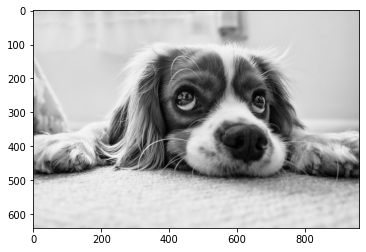

In [69]:
plt.imshow(img_gray, cmap='gray')
plt.show()

- cv2.imread(fileName, flag) : fileName은 이미지 파일의 경로를 의미하고 flag는 이미지 파일을 읽을 때 옵션입니다.
flag는 총 3가지가 있습니다. 명시적으로 써줘도 되고 숫자를 사용해도 됩니다
 - cv2.IMREAD_COLOR(1) : 이미지 파일을 Color로 읽음. 투명한 부분은 무시하며 Default 설정입니다
 - cv2.IMREAD_GRAYSCALE(0) : 이미지 파일을 Grayscale로 읽음. 실제 이미지 처리시 중간 단계로 많이 사용합니다
 - cv2.IMREAD_UNCHAGED(-1) : 이미지 파일을 변형 없이 원본 읽기

imread 사용법

 https://scribblinganything.tistory.com/488


In [70]:
!wget -O flower1.jpg https://cdn.pixabay.com/photo/2015/10/09/00/55/lotus-978659_960_720.jpg
!wget -O flower2.jpg https://cdn.pixabay.com/photo/2012/03/01/00/55/garden-19830_960_720.jpg

--2022-12-26 03:41:08--  https://cdn.pixabay.com/photo/2015/10/09/00/55/lotus-978659_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.37.244, 172.64.150.12, 2606:4700:4400::ac40:960c, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.37.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101795 (99K) [binary/octet-stream]
Saving to: ‘flower1.jpg’

flower1.jpg         100%[===================>]  99.41K  --.-KB/s    in 0.003s  

2022-12-26 03:41:08 (38.2 MB/s) - ‘flower1.jpg’ saved [101795/101795]

--2022-12-26 03:41:08--  https://cdn.pixabay.com/photo/2012/03/01/00/55/garden-19830_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.37.244, 172.64.150.12, 2606:4700:4400::ac40:960c, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.37.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149575 (146K) [binary/octet-stream]
Saving to: ‘flower2.jpg’

flower2.jpg         100%[==================

In [71]:
ls

dog.jpg  drive/  flower1.jpg  flower2.jpg  lady.png  pre.png  sample_data/


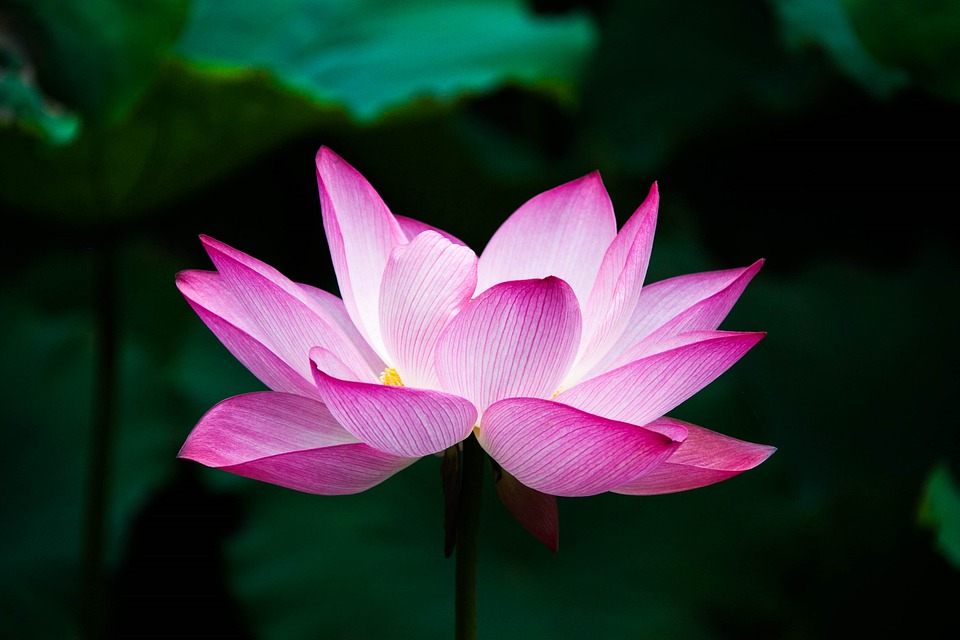

In [75]:
img = cv2.imread('/content/flower1.jpg', -1)
cv2_imshow(img)

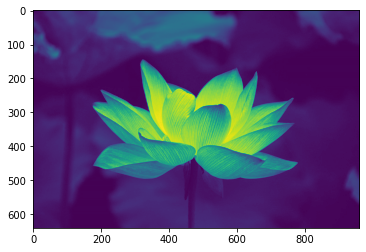

In [76]:
img = cv2.imread('/content/flower1.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.show()